In [1]:
import pandas as pd
import numpy as np

In [2]:
import pickle

In [3]:
with open('train_qa.txt','rb') as f:
    train_data = pickle.load(f)

In [5]:
with open('test_qa.txt','rb') as f:
    test_data = pickle.load(f)

In [6]:
type(test_data)

list

In [7]:
type(train_data)

list

In [8]:
len(train_data)

10000

In [9]:
len(test_data)

1000

In [11]:
train_data[0]

(['Mary',
  'moved',
  'to',
  'the',
  'bathroom',
  '.',
  'Sandra',
  'journeyed',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'hallway', '?'],
 'no')

In [14]:
' '.join(train_data[0][0])

'Mary moved to the bathroom . Sandra journeyed to the bedroom .'

In [15]:
' '.join(train_data[0][1])

'Is Sandra in the hallway ?'

In [16]:
train_data[0][2]

'no'

In [17]:
all_data = test_data+train_data

In [18]:
len(all_data)

11000

In [19]:
set(train_data[0][0])

{'.',
 'Mary',
 'Sandra',
 'bathroom',
 'bedroom',
 'journeyed',
 'moved',
 'the',
 'to'}

In [20]:
vocab = set()
for story,qn,ans in all_data:
    vocab = vocab.union(set(story))
    vocab = vocab.union(set(qn))

In [21]:
vocab.add('no')
vocab.add('yes')

In [22]:
vocab_len = len(vocab)+1

In [23]:
vocab_len

38

In [26]:
# longest story
all_strory_length=[len(data[0]) for data in all_data]

In [27]:
max_story_len = max(all_strory_length) 

In [28]:
max_story_len

156

In [30]:
max_qn_len = max([len(data[1]) for data in all_data])

In [31]:
max_qn_len

6

In [33]:
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

In [35]:
tokenizer = Tokenizer(filters=[])
tokenizer.fit_on_texts(vocab)

In [36]:
tokenizer.word_index

{'left': 1,
 'garden': 2,
 'office': 3,
 'apple': 4,
 'bedroom': 5,
 'hallway': 6,
 'up': 7,
 '?': 8,
 'the': 9,
 '.': 10,
 'got': 11,
 'football': 12,
 'put': 13,
 'yes': 14,
 'milk': 15,
 'john': 16,
 'travelled': 17,
 'dropped': 18,
 'kitchen': 19,
 'daniel': 20,
 'moved': 21,
 'mary': 22,
 'took': 23,
 'sandra': 24,
 'is': 25,
 'no': 26,
 'bathroom': 27,
 'back': 28,
 'down': 29,
 'discarded': 30,
 'went': 31,
 'picked': 32,
 'to': 33,
 'in': 34,
 'there': 35,
 'grabbed': 36,
 'journeyed': 37}

In [37]:
train_story_text =[]
train_qn_text=[]
train_ans = []

In [38]:
for story,qn,ans in train_data:
    train_story_text.append(story)
    train_qn_text.append(qn)
    train_ans.append(ans)

In [40]:
# train_story_text

In [41]:
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [42]:
len(train_story_seq)

10000

In [43]:
len(train_story_text)

10000

In [46]:
# train_story_text

In [47]:
# train_story_seq

In [48]:
def vectorize_stories(data,word_index=tokenizer.word_index,max_story_len=max_story_len,max_qn_len=max_qn_len):
    
#     Stories = x
    X = []
#     questions = xq
    Xq=[]
#     correct anse (yes/no)
    Y=[]
    
    for story,qn,ans in data:
#         for each story 
#         [23,14,.....]
        x = [word_index[word.lower()] for word in story]
        xq = [word_index[word.lower()] for word in qn]
        
        y = np.zeros(len(word_index)+1)
        y[word_index[ans]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
        
    return (pad_sequences(X,maxlen=max_story_len),pad_sequences(Xq,maxlen=max_qn_len),np.array(Y))

In [49]:
inputs_train , qn_train , answers_train = vectorize_stories(train_data)

In [50]:
inputs_test , qn_test , answers_test = vectorize_stories(test_data)

In [51]:
inputs_test

array([[ 0,  0,  0, ...,  9,  5, 10],
       [ 0,  0,  0, ...,  9,  2, 10],
       [ 0,  0,  0, ...,  9,  2, 10],
       ...,
       [ 0,  0,  0, ...,  9,  4, 10],
       [ 0,  0,  0, ...,  9,  2, 10],
       [ 0,  0,  0, ...,  4, 35, 10]])

In [52]:
answers_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [53]:
tokenizer.word_index['yes']

14

In [54]:
tokenizer.word_index['no']

26

In [55]:
sum(answers_test)

array([  0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0., 497.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0., 503.,   0.,   0.,   0.,   0.,   0.,   0.,
         0.,   0.,   0.,   0.,   0.])

In [56]:
from keras.models import Sequential,Model

In [57]:
from keras.layers.embeddings import Embedding

In [69]:
from keras.layers import Input,Activation,Dense,Dropout,add,dot,concatenate,LSTM,Permute

In [70]:
# placehoder shape = (max_story_len,batch_size)
input_sequence = Input((max_story_len,))
questions = Input((max_qn_len,))

In [71]:
# vocab_len
vocab_size = len(vocab)+1

In [72]:
# input encoder m
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim = vocab_size , output_dim = 64))
input_encoder_m.add(Dropout(0.3))

# Output
# (sample,story_maxlen,embedding_dim)

In [73]:
# input encoder c
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim = vocab_size , output_dim = max_qn_len))
input_encoder_c.add(Dropout(0.3))

# Output
# (sample,story_maxlen,qn_maxlen)

In [74]:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim = vocab_size , output_dim = 64,input_length=max_qn_len))
question_encoder.add(Dropout(0.3))

# (sample,qn_maxlen,embedding_dim)

In [75]:
# encoded <---- Encoder(input)
input_encoded_m=input_encoder_m(input_sequence)
input_encoded_c=input_encoder_c(input_sequence)
question_encoded=question_encoder(questions)

In [76]:
match = dot([input_encoded_m,question_encoded],axes=(2,2))
match = Activation('softmax')(match)

In [77]:
response = add([match,input_encoded_c])
response = Permute((2,1))(response)

In [78]:
answer = concatenate([response,question_encoded])

In [79]:
answer

<KerasTensor: shape=(None, 6, 220) dtype=float32 (created by layer 'concatenate')>

In [80]:
answer = LSTM(32)(answer)

In [82]:
answer = Dropout(0.5)(answer)
answer = Dense(vocab_size)(answer) #(sample,vocab_size) # yes/no 0000

In [83]:
answer - Activation('softmax')(answer)

<KerasTensor: shape=(None, 38) dtype=float32 (created by layer 'tf.math.subtract')>

In [84]:
model = Model([input_sequence,questions],answer)

In [85]:
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])

In [86]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 156)]        0                                            
__________________________________________________________________________________________________
input_4 (InputLayer)            [(None, 6)]          0                                            
__________________________________________________________________________________________________
sequential_5 (Sequential)       (None, None, 64)     2432        input_3[0][0]                    
__________________________________________________________________________________________________
sequential_7 (Sequential)       (None, 6, 64)        2432        input_4[0][0]                    
______________________________________________________________________________________________

In [186]:
history = model.fit([inputs_train,qn_train],answers_train,batch_size=32 ,epochs=10,validation_data=([inputs_test,qn_test],answers_test))

Epoch 1/10
313/313 [==============================] - 3s 11ms/step - loss: 8.4939 - accuracy: 0.4153 - val_loss: 8.0107 - val_accuracy: 0.4970
Epoch 2/10
313/313 [==============================] - 3s 11ms/step - loss: 8.4612 - accuracy: 0.4213 - val_loss: 8.0107 - val_accuracy: 0.4970
Epoch 3/10
313/313 [==============================] - 3s 11ms/step - loss: 8.6788 - accuracy: 0.4196 - val_loss: 8.0107 - val_accuracy: 0.4970
Epoch 4/10
313/313 [==============================] - 4s 12ms/step - loss: 8.5858 - accuracy: 0.4222 - val_loss: 8.0107 - val_accuracy: 0.4970
Epoch 5/10
313/313 [==============================] - 4s 12ms/step - loss: 8.5757 - accuracy: 0.4172 - val_loss: 8.0107 - val_accuracy: 0.4970
Epoch 6/10
313/313 [==============================] - 4s 12ms/step - loss: 8.4587 - accuracy: 0.4178 - val_loss: 8.0107 - val_accuracy: 0.4970
Epoch 7/10
313/313 [==============================] - 4s 12ms/step - loss: 8.5319 - accuracy: 0.4146 - val_loss: 8.0107 - val_accuracy: 0.4970

In [187]:
from pickle import dump,load

In [188]:
# model.save('chatBot_epochs100.h5')

In [189]:
# dump(tokenizer,open('chatBot_tokenizer_epoc100','wb'))

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


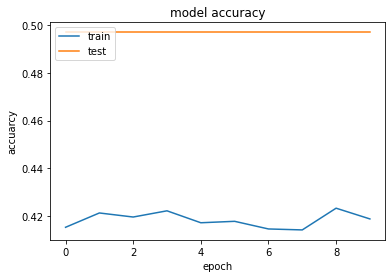

In [190]:
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
# summarize history for accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuarcy')
plt.xlabel('epoch')
plt.legend(['train','test'],loc='upper left')
plt.show()

In [191]:
model.load_weights('chatBot_epochs100.h5')

In [192]:
pred_results = model.predict(([inputs_test,qn_test]))

In [193]:
test_data[0][0]

['Mary',
 'got',
 'the',
 'milk',
 'there',
 '.',
 'John',
 'moved',
 'to',
 'the',
 'bedroom',
 '.']

In [194]:
test_data[0][1]

['Is', 'John', 'in', 'the', 'kitchen', '?']

In [195]:
test_data[0][2]

'no'

In [196]:
pred_results[0]

array([-0.7341388 ,  0.41359383, -0.08533368,  0.17443319,  0.20341171,
        0.48324695,  1.0392494 , -1.1335027 ,  0.36698973, -0.08591534,
        0.71289414, -1.0603939 ,  0.28601888, -0.7389442 ,  5.186487  ,
       -0.26186344,  0.42564183,  0.68045783,  0.30685896,  0.50068843,
        0.77066827, -0.08425578,  0.35980493, -0.11662035, -0.18354572,
       -0.7408399 , -4.6188707 ,  0.4251469 , -1.2471368 , -0.3499023 ,
       -0.75358707,  0.7050235 ,  0.52755934, -1.7903557 , -0.74074537,
       -0.1456466 , -0.29607272, -0.6159985 ], dtype=float32)

In [197]:
val_max = np.argmax(pred_results[0])

In [198]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [199]:
k

'yes'

In [200]:
pred_results[0][val_max]

5.186487

In [201]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [202]:
my_story = "John left the kitchen . Sandra dropped the football in the garden ."

In [203]:
my_story.split()

['John',
 'left',
 'the',
 'kitchen',
 '.',
 'Sandra',
 'dropped',
 'the',
 'football',
 'in',
 'the',
 'garden',
 '.']

In [204]:
my_question = "Is the football in the garden ?"

In [205]:
my_question.split()

['Is', 'the', 'football', 'in', 'the', 'garden', '?']

In [206]:
my_data = [(my_story.split(),my_question.split(),'yes')]

In [207]:
my_data

[(['John',
   'left',
   'the',
   'kitchen',
   '.',
   'Sandra',
   'dropped',
   'the',
   'football',
   'in',
   'the',
   'garden',
   '.'],
  ['Is', 'the', 'football', 'in', 'the', 'garden', '?'],
  'yes')]

In [208]:
my_story , my_ques , my_ans = vectorize_stories(my_data)

In [209]:
my_ans

array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0.]])

In [210]:
pred_results = model.predict(([my_story,my_ques]))

In [211]:
val_max = np.argmax(pred_results[0])

In [212]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key

In [213]:
k

'yes'

In [214]:
pred_results[0][val_max]

5.187813